## Categorical Distribution
- bernoulli distribution의 확장판
- RV(확률변수) : x = (x1,x2,.......,) 벡터형태로 가짐
- ex) x = 1이면, (1,0,0,0,0,0,0......) ```One Hot Encoding```

In [12]:
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc("font", family=font_name)

In [1]:
theta = np.array([1/6]*6)
rv = sp.stats.multinomial(1, theta) # 시행횟수를 1로 설정하면 카테고리 분포

In [2]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


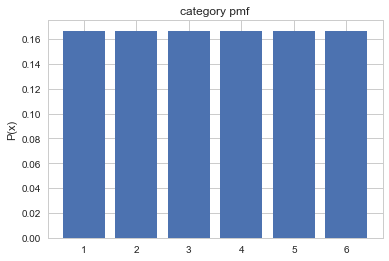

In [3]:
plt.bar(xx, rv.pmf(xx_ohe))
plt.ylabel("P(x)")
plt.title("category pmf")
plt.show()

In [4]:
X = rv.rvs(100, random_state=0)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])

In [10]:
X.sum(axis=0) # 행의 같은자리끼리 총합

array([14, 19, 11, 20, 16, 20])

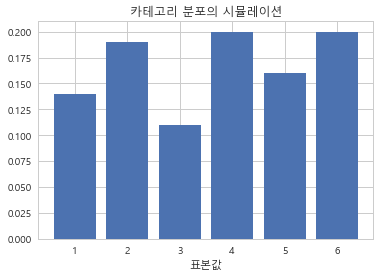

In [13]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [15]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,시뮬레이션,0.140000
1,1,이론,0.166667
2,2,시뮬레이션,0.190000
3,2,이론,0.166667
4,3,시뮬레이션,0.110000
5,3,이론,0.166667
6,4,시뮬레이션,0.200000
7,4,이론,0.166667
8,5,시뮬레이션,0.160000
9,5,이론,0.166667


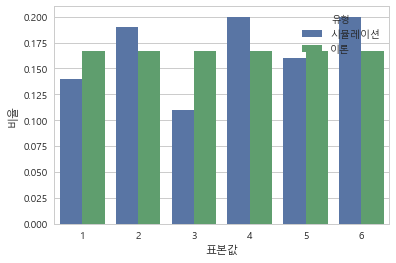

In [22]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df,)
plt.show()

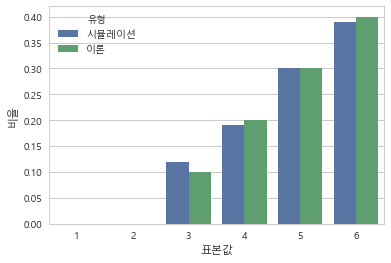

In [23]:
# theta : unfair하게 바꿈
eps = np.finfo(np.float).eps
theta = np.array([eps, eps, 0.1, 0.2, 0.3, 0.4])
rv = sp.stats.multinomial(1, theta)

X = rv.rvs(100, random_state=1)
y = X.sum(axis=0) / float(len(X))

df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()